In [23]:
import pandas as pd
import numpy as np
import re

# Data Exploration

In [24]:
# Load in the train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [25]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [26]:
train.describe

<bound method NDFrame.describe of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w.

Text(0, 0.5, 'tweets')

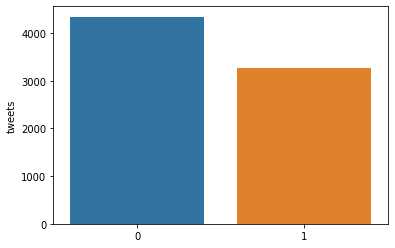

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
# inspect the target class distribution
x=train.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('tweets')
# There are slightly more Real Disaster then Fake One.

# Missing values are same percentage for train and test

In [28]:
train['keyword'].isna().sum()

61

In [29]:
test['keyword'].isna().sum()

26

In [30]:
train['location'].isna().sum()

2533

In [31]:
test['location'].isna().sum()

1105

In [32]:
print('Keyword missing in train set is %f, and in test set is %f'%(train['keyword'].isna().sum()/len(train), test['keyword'].isna().sum()/len(test)))
print('Location missing in train set is %f, and in test set is %f'%(train['location'].isna().sum()/len(train), test['location'].isna().sum()/len(test)))

Keyword missing in train set is 0.008013, and in test set is 0.007968
Location missing in train set is 0.332720, and in test set is 0.338645


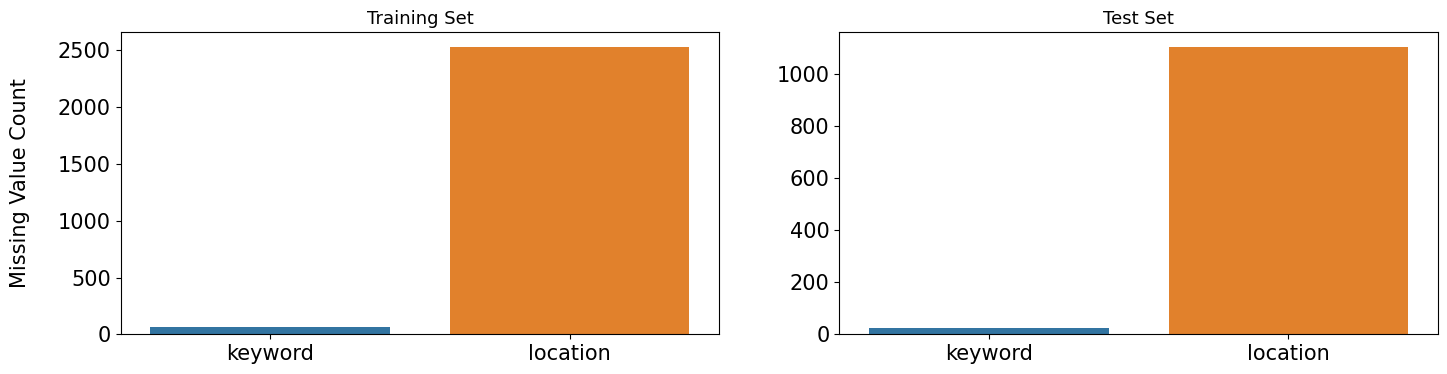

In [33]:
# There are too many Null value in 'location', thus we cant use it as a feature
import matplotlib.pyplot as plt
import seaborn as sns

missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=train[missing_cols].isnull().sum().index, y=train[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=test[missing_cols].isnull().sum().index, y=test[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

for df in [train, test]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')

# Key word analysis

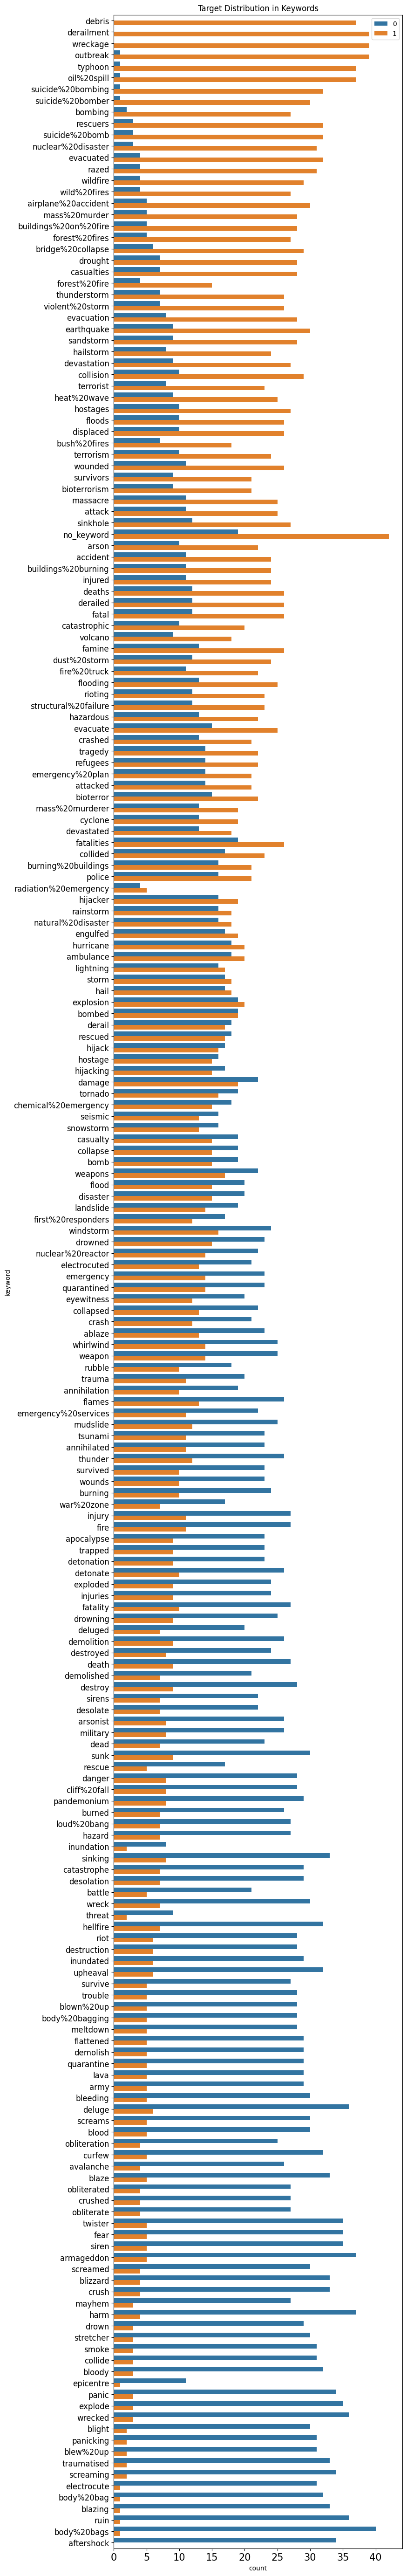

In [34]:
train['target_mean'] =train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=train.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

train.drop(columns=['target_mean'], inplace=True)

In [35]:
#combine keyword into text
train['text'] = train['text']+train['keyword']
test['text'] = test['text']+test['keyword']


# Features generation

In [36]:
from nltk.corpus import stopwords
import string

stop=set(stopwords.words('english'))

# word_count
train['word_count'] = train['text'].apply(lambda x: len(str(x).split()))
test['word_count'] = test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
train['unique_word_count'] = train['text'].apply(lambda x: len(set(str(x).split())))
test['unique_word_count'] = test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
train['stop_word_count'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop]))
test['stop_word_count'] = test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop]))

# url_count
train['url_count'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
test['url_count'] = test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
train['mean_word_length'] = train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test['mean_word_length'] = test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
train['char_count'] = train['text'].apply(lambda x: len(str(x)))
test['char_count'] = test['text'].apply(lambda x: len(str(x)))

# punctuation_count
train['punctuation_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
test['punctuation_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
train['hashtag_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
test['hashtag_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
train['mention_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
test['mention_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))


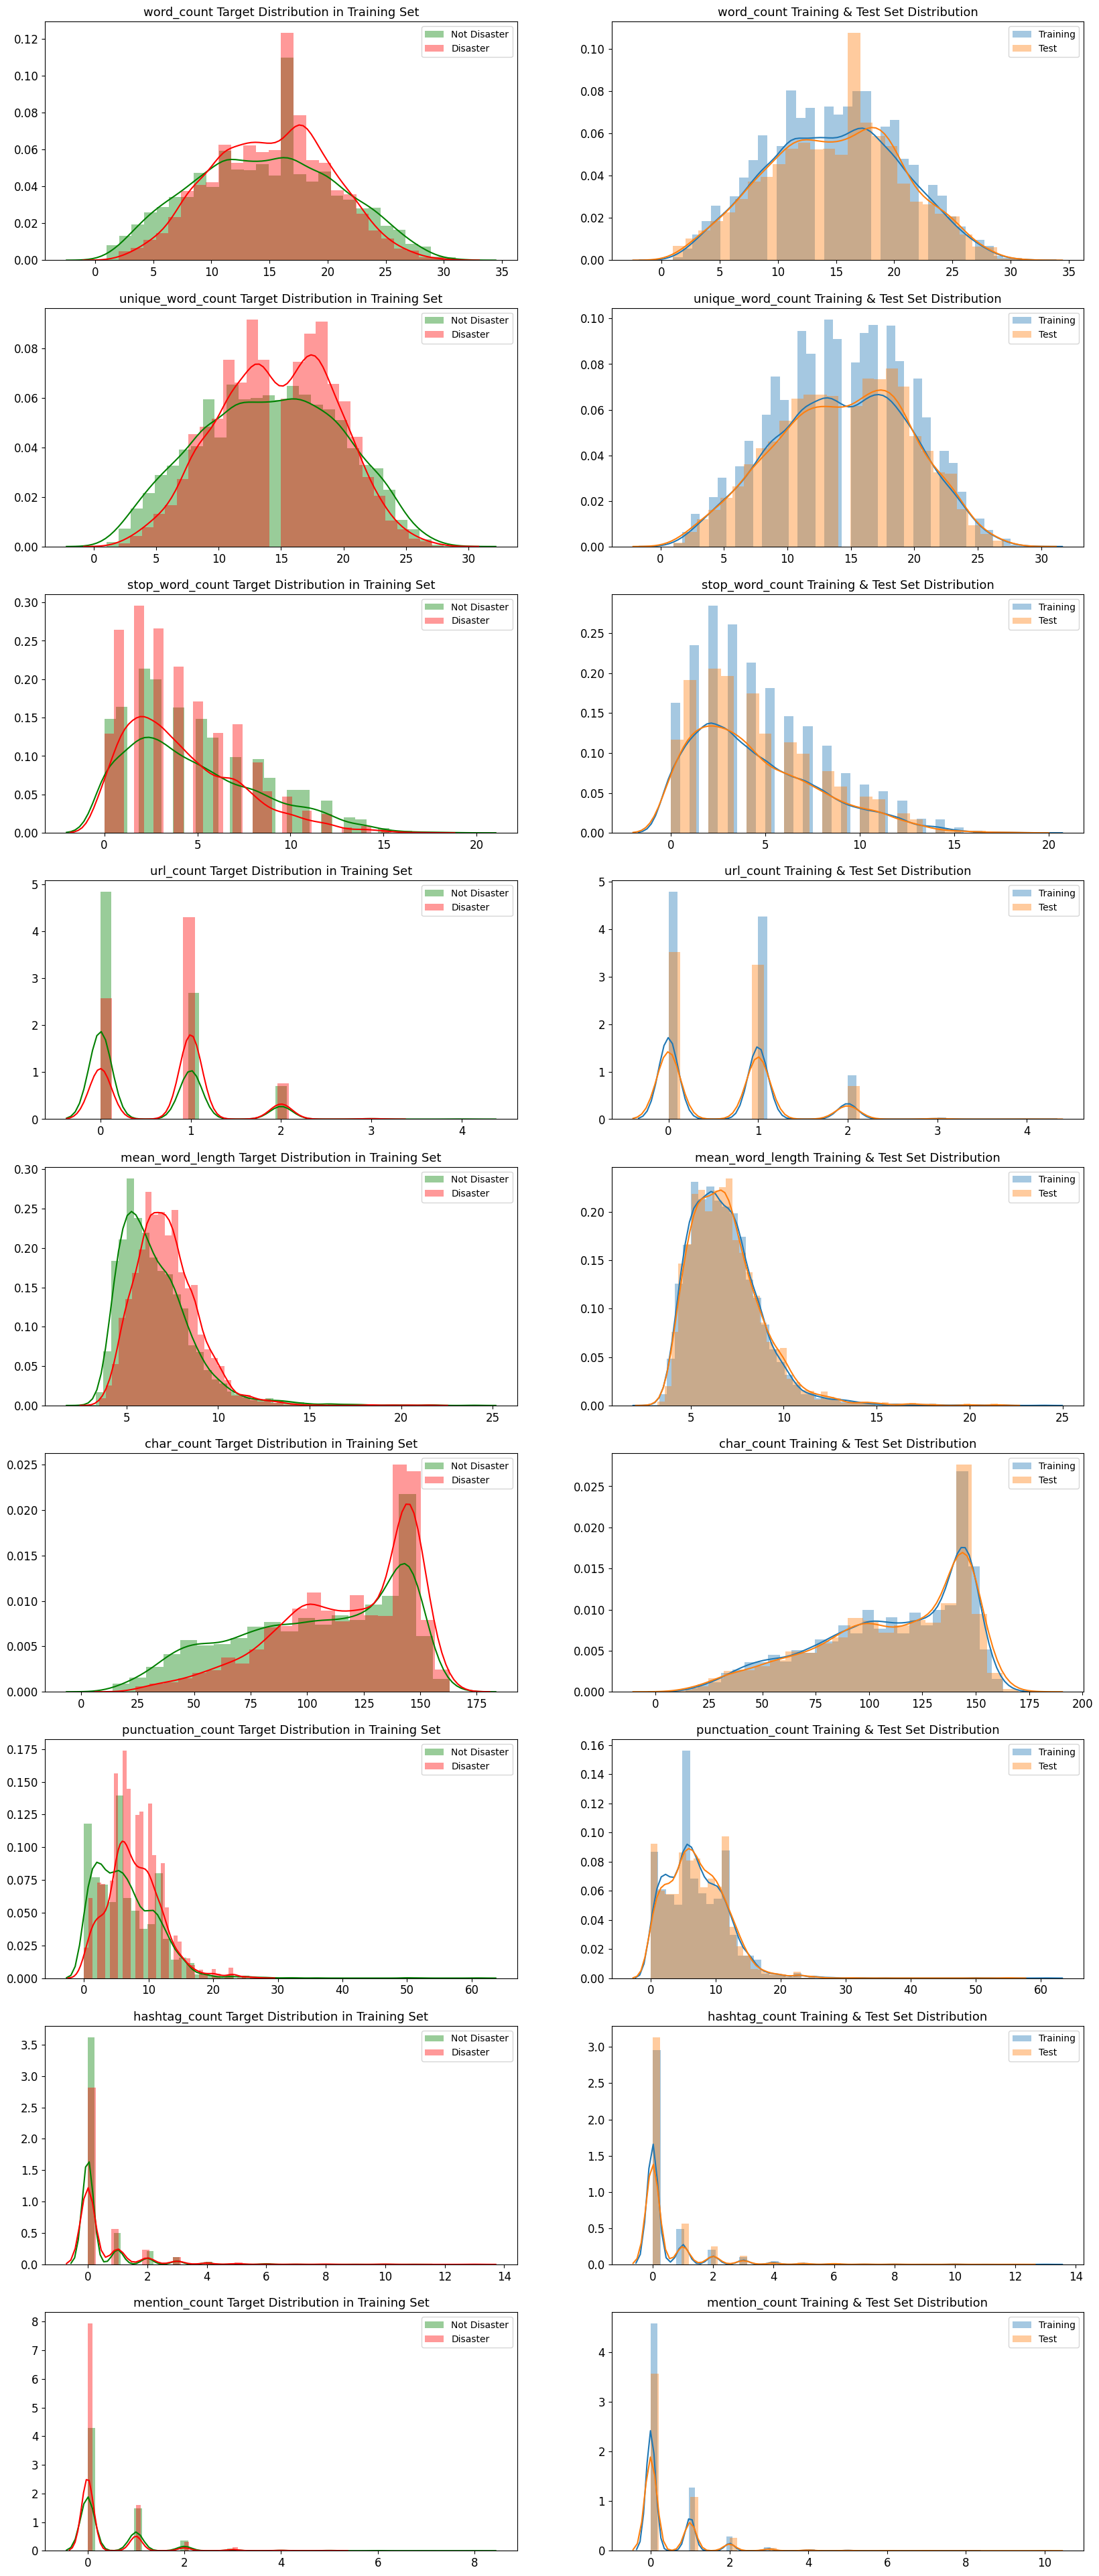

In [37]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = train['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(train.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(train[feature], label='Training', ax=axes[i][1])
    sns.distplot(test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

In [45]:
train=train.drop(columns=['url_count', 'hashtag_count','mention_count','keyword','location'])
test=test.drop(columns=['url_count', 'hashtag_count','mention_count','keyword','location'])

# Unigram and Bigram

In [47]:
from collections import defaultdict

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 10

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

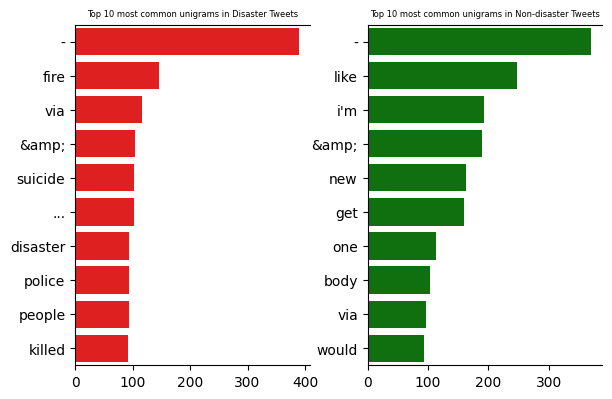

In [48]:
fig, axes = plt.subplots(ncols=2, dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x')
    axes[i].tick_params(axis='y')

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=6)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=6)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


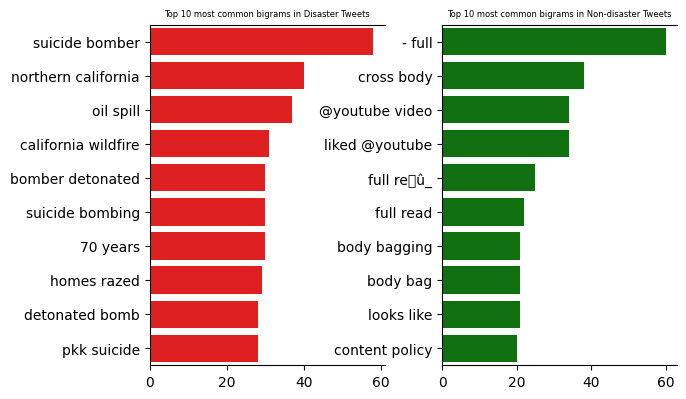

In [49]:
fig, axes = plt.subplots(ncols=2, dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x')
    axes[i].tick_params(axis='y')

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=6)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=6)

plt.show()

# Text cleaning

In [19]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

def remove_Uppercase(text):
    return text.lower()

from nltk.tokenize import word_tokenize 
def remove_stopwords(text):
    """Remove stop words from list of tokenized words"""
    words = word_tokenize(text)
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in new_words]).strip()

def contractions(tweet): 

    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    return tweet

def clean(tweet): 

    tweet=remove_URL(tweet)
    tweet=remove_html(tweet)
    tweet=remove_punct(tweet)
    tweet=remove_Uppercase(tweet)
    tweet=remove_stopwords(tweet)
    tweet = contractions(tweet)
    
    return tweet

train['text'] = train['text'].apply(lambda s : clean(s))
test['text'] = test['text'].apply(lambda s : clean(s))

# Unigram and Bigrams after text cleaning

In [51]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 10

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

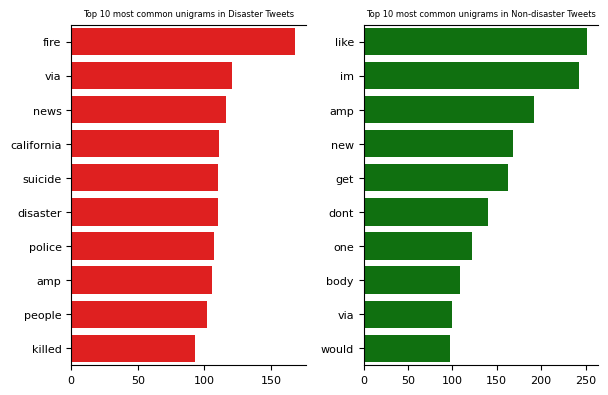

In [52]:
fig, axes = plt.subplots(ncols=2, dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=6)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=6)

plt.show()

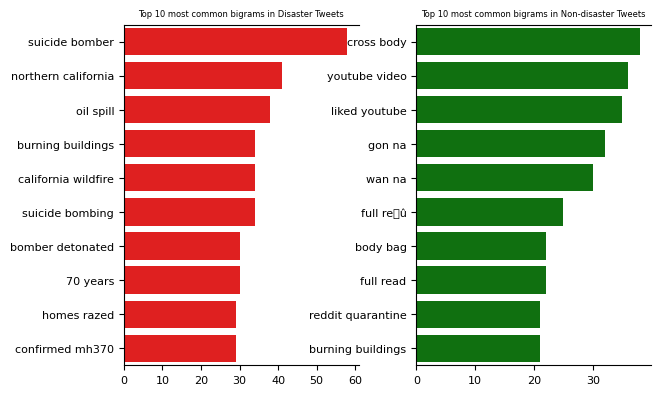

In [53]:
fig, axes = plt.subplots(ncols=2, dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=6)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=6)

plt.show()

# TFIDF

In [20]:
from sklearn.model_selection import train_test_split

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(train, train.target, test_size=0.2, random_state=1)
print(X_train_sub.shape, y_train_sub.shape)
print(X_test_sub.shape, y_test_sub.shape)

train_text = X_train_sub.text.tolist()

from sklearn.feature_extraction.text import TfidfVectorizer
tfvec = TfidfVectorizer(train_text,ngram_range=(1,6),analyzer='char', min_df=20)
train_textvec=tfvec.fit_transform(train_text)

train_textvec.shape

X_train_sub.head

(6090, 15) (6090,)
(1523, 15) (1523,)


<bound method NDFrame.head of         id            keyword                    location  \
1163  1675  bridge%20collapse                 no_location   
4989  7118           military              somewhere USA    
6913  9912            trouble                YA MOTHA BED   
6711  9611       thunderstorm                     Jupiter   
2736  3933         devastated                 no_location   
...    ...                ...                         ...   
905   1308             bloody                 no_location   
5192  7413        obliterated                 no_location   
3980  5656           flooding     Kualar Lumpur, Malaysia   
235    335        annihilated  Û¢ Views From The Six Û¢   
5157  7356         obliterate                    Purfleet   

                                                   text  target  word_count  \
1163  sioux city fire officials believe bridge colla...       1          18   
4989  strongly support military amp families cock su...       0          18   


In [55]:
train_fe= X_train_sub[['word_count', 'unique_word_count', 'stop_word_count',
                   'mean_word_length', 'char_count','punctuation_count']].to_numpy()

from scipy.sparse import hstack
X_train = hstack([train_textvec, train_fe])
y_train  = y_train_sub.tolist()

val_text = X_test_sub.text.tolist()
val_textvec=tfvec.transform(val_text)
val_fe= X_test_sub[['word_count', 'unique_word_count', 'stop_word_count',
                   'mean_word_length', 'char_count','punctuation_count']].to_numpy()

X_test = hstack([val_textvec, val_fe])
y_test  = y_test_sub.tolist()

# for test result file treatment
test_text_tfidf = test.text.tolist()
test_textvec_tfidf=tfvec.transform(test_text_tfidf)
test_fe= test[['word_count', 'unique_word_count', 'stop_word_count',
                   'mean_word_length', 'char_count','punctuation_count']].to_numpy()

test_tfidf = hstack([test_textvec_tfidf, test_fe])

# CountVectorizer

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
train_cv=count_vectorizer.fit_transform(train_text).todense()

val_text_cv = X_test_sub.text.tolist()
val_textvec_cv=count_vectorizer.transform(val_text_cv).todense()

import scipy.sparse
train_cv=scipy.sparse.csr_matrix(train_cv)
test_cv=scipy.sparse.csr_matrix(val_textvec_cv)

# for test result file treatment
test_text_cv = test.text.tolist()
test_textvec_cv=scipy.sparse.csr_matrix(count_vectorizer.transform(test_text_cv).todense())
test_fe_cv= test[['word_count', 'unique_word_count', 'stop_word_count',
                   'mean_word_length', 'char_count','punctuation_count']].to_numpy()

test_result_cv = hstack([test_textvec_cv, test_fe_cv])

In [57]:
X_train_cv = hstack([train_cv, train_fe])
X_test_cv = hstack([test_cv, val_fe])

# Build Models and compare result

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def fit_and_predict(model, X_train,y_train,X_test,y_test,x_result_test):
    
    clf = model()
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    confusion_matrix(y_test,predictions)
    
    result_prediction=clf.predict(x_result_test)
    
    print(classification_report(y_test,predictions))
    print('-'*50)
    print('{}'.format(model))
    print('-'*50)
    print('Accuracy of classifier on train set:{}%'.format(round(clf.score(X_train,y_train)*100)))
    print('-'*50)
    print('Accuracy of classifier on test set:{}%'.format(round(accuracy_score(y_test,predictions)*100)))
    print('-'*50)
    
    return result_prediction

In [61]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)

In [224]:
#train model with TF-IDF
models=[LogisticRegression, LinearSVC, MultinomialNB, GradientBoostingClassifier, CatBoostClassifier]
Classifier=['LogisticRegression', 'LinearSVC', 'MultinomialNB', 'GradientBoostingClassifier', 'CatBoostClassifier']
count=0
result={}
for model in models:
    result[Classifier[count]]=fit_and_predict(model, X_train,y_train,X_test,y_test,test_tfidf)
    count+=1


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.79      0.86      0.82       882
           1       0.78      0.68      0.72       641

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523

--------------------------------------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
--------------------------------------------------
Accuracy of classifier on train set:80.0%
--------------------------------------------------
Accuracy of classifier on test set:78.0%
--------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.86      0.52      0.64       882
           1       0.57      0.88      0.69       641

    accuracy                           0.67      1523
   macro avg       0.71      0.70      0.67      1523
weighted avg       0.74      0.67      0.66      1523

--------------------------------------------------
<class 'sklearn.svm._classes.LinearSVC'>
--------------------------------------------------
Accuracy of classifier on train set:69.0%
--------------------------------------------------
Accuracy of classifier on test set:67.0%
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       882
           1       0.75      0.67      0.71       641

    accuracy                           0.77      1523
   macro avg       0.76      0.75      0.76      1523
weighted avg       0.76      0.77      0.76      1523

------------------

119:	learn: 0.5476565	total: 1m 19s	remaining: 9m 39s
120:	learn: 0.5472015	total: 1m 19s	remaining: 9m 39s
121:	learn: 0.5466882	total: 1m 20s	remaining: 9m 37s
122:	learn: 0.5460013	total: 1m 20s	remaining: 9m 36s
123:	learn: 0.5453991	total: 1m 21s	remaining: 9m 35s
124:	learn: 0.5448407	total: 1m 22s	remaining: 9m 34s
125:	learn: 0.5444664	total: 1m 22s	remaining: 9m 32s
126:	learn: 0.5439494	total: 1m 23s	remaining: 9m 31s
127:	learn: 0.5434341	total: 1m 23s	remaining: 9m 29s
128:	learn: 0.5431252	total: 1m 24s	remaining: 9m 28s
129:	learn: 0.5426136	total: 1m 24s	remaining: 9m 26s
130:	learn: 0.5420072	total: 1m 25s	remaining: 9m 25s
131:	learn: 0.5415414	total: 1m 25s	remaining: 9m 23s
132:	learn: 0.5409689	total: 1m 26s	remaining: 9m 22s
133:	learn: 0.5404560	total: 1m 26s	remaining: 9m 21s
134:	learn: 0.5398727	total: 1m 27s	remaining: 9m 20s
135:	learn: 0.5394607	total: 1m 28s	remaining: 9m 20s
136:	learn: 0.5388513	total: 1m 28s	remaining: 9m 19s
137:	learn: 0.5383884	total:

272:	learn: 0.4897391	total: 2m 54s	remaining: 7m 43s
273:	learn: 0.4895210	total: 2m 54s	remaining: 7m 42s
274:	learn: 0.4891363	total: 2m 55s	remaining: 7m 42s
275:	learn: 0.4889162	total: 2m 55s	remaining: 7m 41s
276:	learn: 0.4886021	total: 2m 56s	remaining: 7m 40s
277:	learn: 0.4882478	total: 2m 57s	remaining: 7m 39s
278:	learn: 0.4880022	total: 2m 57s	remaining: 7m 39s
279:	learn: 0.4877083	total: 2m 58s	remaining: 7m 38s
280:	learn: 0.4873952	total: 2m 58s	remaining: 7m 37s
281:	learn: 0.4871790	total: 2m 59s	remaining: 7m 37s
282:	learn: 0.4868900	total: 3m	remaining: 7m 36s
283:	learn: 0.4865679	total: 3m	remaining: 7m 35s
284:	learn: 0.4861955	total: 3m 1s	remaining: 7m 34s
285:	learn: 0.4858609	total: 3m 1s	remaining: 7m 33s
286:	learn: 0.4855507	total: 3m 2s	remaining: 7m 32s
287:	learn: 0.4852897	total: 3m 2s	remaining: 7m 31s
288:	learn: 0.4850204	total: 3m 3s	remaining: 7m 31s
289:	learn: 0.4847414	total: 3m 3s	remaining: 7m 30s
290:	learn: 0.4844479	total: 3m 4s	remaini

426:	learn: 0.4461813	total: 4m 29s	remaining: 6m 1s
427:	learn: 0.4459590	total: 4m 29s	remaining: 6m
428:	learn: 0.4456355	total: 4m 30s	remaining: 5m 59s
429:	learn: 0.4453542	total: 4m 30s	remaining: 5m 59s
430:	learn: 0.4450797	total: 4m 31s	remaining: 5m 58s
431:	learn: 0.4446686	total: 4m 32s	remaining: 5m 57s
432:	learn: 0.4442721	total: 4m 32s	remaining: 5m 56s
433:	learn: 0.4439637	total: 4m 33s	remaining: 5m 56s
434:	learn: 0.4437346	total: 4m 33s	remaining: 5m 55s
435:	learn: 0.4434385	total: 4m 34s	remaining: 5m 54s
436:	learn: 0.4431579	total: 4m 34s	remaining: 5m 53s
437:	learn: 0.4428385	total: 4m 35s	remaining: 5m 53s
438:	learn: 0.4425668	total: 4m 35s	remaining: 5m 52s
439:	learn: 0.4422480	total: 4m 36s	remaining: 5m 51s
440:	learn: 0.4419723	total: 4m 36s	remaining: 5m 50s
441:	learn: 0.4416971	total: 4m 37s	remaining: 5m 50s
442:	learn: 0.4413847	total: 4m 37s	remaining: 5m 49s
443:	learn: 0.4411031	total: 4m 38s	remaining: 5m 48s
444:	learn: 0.4407745	total: 4m 3

579:	learn: 0.3997348	total: 5m 51s	remaining: 4m 14s
580:	learn: 0.3994051	total: 5m 52s	remaining: 4m 13s
581:	learn: 0.3991034	total: 5m 52s	remaining: 4m 13s
582:	learn: 0.3988129	total: 5m 53s	remaining: 4m 12s
583:	learn: 0.3984930	total: 5m 53s	remaining: 4m 11s
584:	learn: 0.3981952	total: 5m 54s	remaining: 4m 11s
585:	learn: 0.3978973	total: 5m 54s	remaining: 4m 10s
586:	learn: 0.3976132	total: 5m 55s	remaining: 4m 9s
587:	learn: 0.3973743	total: 5m 55s	remaining: 4m 9s
588:	learn: 0.3971123	total: 5m 56s	remaining: 4m 8s
589:	learn: 0.3968082	total: 5m 56s	remaining: 4m 7s
590:	learn: 0.3963361	total: 5m 57s	remaining: 4m 7s
591:	learn: 0.3960386	total: 5m 57s	remaining: 4m 6s
592:	learn: 0.3959465	total: 5m 58s	remaining: 4m 5s
593:	learn: 0.3958410	total: 5m 58s	remaining: 4m 5s
594:	learn: 0.3955943	total: 5m 59s	remaining: 4m 4s
595:	learn: 0.3953634	total: 5m 59s	remaining: 4m 3s
596:	learn: 0.3951655	total: 6m	remaining: 4m 3s
597:	learn: 0.3948498	total: 6m	remaining: 

733:	learn: 0.3621900	total: 7m 12s	remaining: 2m 36s
734:	learn: 0.3620266	total: 7m 13s	remaining: 2m 36s
735:	learn: 0.3617864	total: 7m 13s	remaining: 2m 35s
736:	learn: 0.3615294	total: 7m 14s	remaining: 2m 35s
737:	learn: 0.3613802	total: 7m 15s	remaining: 2m 34s
738:	learn: 0.3611472	total: 7m 15s	remaining: 2m 33s
739:	learn: 0.3609189	total: 7m 16s	remaining: 2m 33s
740:	learn: 0.3606663	total: 7m 16s	remaining: 2m 32s
741:	learn: 0.3604310	total: 7m 17s	remaining: 2m 32s
742:	learn: 0.3603118	total: 7m 17s	remaining: 2m 31s
743:	learn: 0.3601454	total: 7m 18s	remaining: 2m 30s
744:	learn: 0.3598534	total: 7m 18s	remaining: 2m 30s
745:	learn: 0.3597813	total: 7m 19s	remaining: 2m 29s
746:	learn: 0.3594817	total: 7m 19s	remaining: 2m 28s
747:	learn: 0.3591986	total: 7m 20s	remaining: 2m 28s
748:	learn: 0.3589616	total: 7m 20s	remaining: 2m 27s
749:	learn: 0.3586971	total: 7m 21s	remaining: 2m 27s
750:	learn: 0.3584679	total: 7m 21s	remaining: 2m 26s
751:	learn: 0.3581509	total:

886:	learn: 0.3327970	total: 8m 35s	remaining: 1m 5s
887:	learn: 0.3326301	total: 8m 36s	remaining: 1m 5s
888:	learn: 0.3324734	total: 8m 36s	remaining: 1m 4s
889:	learn: 0.3322885	total: 8m 37s	remaining: 1m 3s
890:	learn: 0.3321099	total: 8m 37s	remaining: 1m 3s
891:	learn: 0.3319841	total: 8m 38s	remaining: 1m 2s
892:	learn: 0.3319200	total: 8m 38s	remaining: 1m 2s
893:	learn: 0.3317415	total: 8m 39s	remaining: 1m 1s
894:	learn: 0.3315057	total: 8m 39s	remaining: 1m
895:	learn: 0.3314139	total: 8m 40s	remaining: 1m
896:	learn: 0.3312333	total: 8m 40s	remaining: 59.8s
897:	learn: 0.3311870	total: 8m 41s	remaining: 59.2s
898:	learn: 0.3311089	total: 8m 41s	remaining: 58.6s
899:	learn: 0.3308837	total: 8m 42s	remaining: 58s
900:	learn: 0.3306184	total: 8m 42s	remaining: 57.4s
901:	learn: 0.3304897	total: 8m 43s	remaining: 56.8s
902:	learn: 0.3303198	total: 8m 43s	remaining: 56.3s
903:	learn: 0.3302530	total: 8m 44s	remaining: 55.7s
904:	learn: 0.3299895	total: 8m 44s	remaining: 55.1s
9

In [72]:
models=[LogisticRegression, LinearSVC, MultinomialNB, GradientBoostingClassifier, CatBoostClassifier]
Classifier=['LogisticRegression', 'LinearSVC', 'MultinomialNB', 'GradientBoostingClassifier', 'CatBoostClassifier']
count_cv=0
result_cv={}
for model in models:
    result_cv[Classifier[count_cv]]=fit_and_predict(model, X_train_cv,y_train,X_test_cv,y_test,test_result_cv )
    count_cv+=1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       882
           1       0.80      0.70      0.74       641

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523

--------------------------------------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
--------------------------------------------------
Accuracy of classifier on train set:87.0%
--------------------------------------------------
Accuracy of classifier on test set:80.0%
--------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       882
           1       0.79      0.71      0.74       641

    accuracy                           0.80      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523

--------------------------------------------------
<class 'sklearn.svm._classes.LinearSVC'>
--------------------------------------------------
Accuracy of classifier on train set:90.0%
--------------------------------------------------
Accuracy of classifier on test set:80.0%
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       882
           1       0.79      0.70      0.74       641

    accuracy                           0.80      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523

------------------

122:	learn: 0.5802402	total: 7.17s	remaining: 51.1s
123:	learn: 0.5799410	total: 7.23s	remaining: 51.1s
124:	learn: 0.5794832	total: 7.28s	remaining: 51s
125:	learn: 0.5788369	total: 7.33s	remaining: 50.9s
126:	learn: 0.5784766	total: 7.39s	remaining: 50.8s
127:	learn: 0.5779977	total: 7.45s	remaining: 50.8s
128:	learn: 0.5775187	total: 7.5s	remaining: 50.7s
129:	learn: 0.5770851	total: 7.55s	remaining: 50.5s
130:	learn: 0.5766625	total: 7.61s	remaining: 50.5s
131:	learn: 0.5763540	total: 7.66s	remaining: 50.4s
132:	learn: 0.5758436	total: 7.71s	remaining: 50.3s
133:	learn: 0.5755209	total: 7.77s	remaining: 50.2s
134:	learn: 0.5751047	total: 7.82s	remaining: 50.1s
135:	learn: 0.5747382	total: 7.88s	remaining: 50s
136:	learn: 0.5745045	total: 7.93s	remaining: 49.9s
137:	learn: 0.5742113	total: 7.98s	remaining: 49.9s
138:	learn: 0.5739504	total: 8.04s	remaining: 49.8s
139:	learn: 0.5736186	total: 8.1s	remaining: 49.8s
140:	learn: 0.5732936	total: 8.16s	remaining: 49.7s
141:	learn: 0.5729

282:	learn: 0.5374353	total: 16s	remaining: 40.7s
283:	learn: 0.5372046	total: 16.1s	remaining: 40.6s
284:	learn: 0.5369229	total: 16.2s	remaining: 40.6s
285:	learn: 0.5368001	total: 16.2s	remaining: 40.5s
286:	learn: 0.5365806	total: 16.3s	remaining: 40.5s
287:	learn: 0.5363587	total: 16.3s	remaining: 40.4s
288:	learn: 0.5360317	total: 16.4s	remaining: 40.4s
289:	learn: 0.5358290	total: 16.5s	remaining: 40.3s
290:	learn: 0.5355700	total: 16.5s	remaining: 40.3s
291:	learn: 0.5354235	total: 16.6s	remaining: 40.2s
292:	learn: 0.5352776	total: 16.7s	remaining: 40.2s
293:	learn: 0.5350855	total: 16.7s	remaining: 40.1s
294:	learn: 0.5349471	total: 16.8s	remaining: 40.1s
295:	learn: 0.5347319	total: 16.8s	remaining: 40s
296:	learn: 0.5345164	total: 16.9s	remaining: 40s
297:	learn: 0.5343303	total: 17s	remaining: 40s
298:	learn: 0.5342051	total: 17s	remaining: 39.9s
299:	learn: 0.5340022	total: 17.1s	remaining: 39.9s
300:	learn: 0.5338162	total: 17.1s	remaining: 39.8s
301:	learn: 0.5336575	to

441:	learn: 0.5033720	total: 25.8s	remaining: 32.5s
442:	learn: 0.5031577	total: 25.8s	remaining: 32.5s
443:	learn: 0.5029368	total: 25.9s	remaining: 32.5s
444:	learn: 0.5027353	total: 26s	remaining: 32.4s
445:	learn: 0.5025344	total: 26.1s	remaining: 32.4s
446:	learn: 0.5022814	total: 26.2s	remaining: 32.4s
447:	learn: 0.5020314	total: 26.3s	remaining: 32.4s
448:	learn: 0.5017895	total: 26.3s	remaining: 32.3s
449:	learn: 0.5015960	total: 26.4s	remaining: 32.3s
450:	learn: 0.5013904	total: 26.5s	remaining: 32.3s
451:	learn: 0.5011306	total: 26.6s	remaining: 32.2s
452:	learn: 0.5009322	total: 26.6s	remaining: 32.2s
453:	learn: 0.5007509	total: 26.7s	remaining: 32.1s
454:	learn: 0.5005043	total: 26.8s	remaining: 32.1s
455:	learn: 0.5002433	total: 26.8s	remaining: 32s
456:	learn: 0.4999763	total: 26.9s	remaining: 31.9s
457:	learn: 0.4997012	total: 26.9s	remaining: 31.9s
458:	learn: 0.4994029	total: 27s	remaining: 31.8s
459:	learn: 0.4991692	total: 27.1s	remaining: 31.8s
460:	learn: 0.4989

602:	learn: 0.4696403	total: 36.3s	remaining: 23.9s
603:	learn: 0.4694500	total: 36.4s	remaining: 23.8s
604:	learn: 0.4692677	total: 36.4s	remaining: 23.8s
605:	learn: 0.4690580	total: 36.5s	remaining: 23.7s
606:	learn: 0.4688960	total: 36.6s	remaining: 23.7s
607:	learn: 0.4687468	total: 36.6s	remaining: 23.6s
608:	learn: 0.4685736	total: 36.7s	remaining: 23.6s
609:	learn: 0.4683589	total: 36.8s	remaining: 23.5s
610:	learn: 0.4681818	total: 36.8s	remaining: 23.4s
611:	learn: 0.4680346	total: 36.9s	remaining: 23.4s
612:	learn: 0.4678997	total: 37s	remaining: 23.3s
613:	learn: 0.4676935	total: 37.1s	remaining: 23.3s
614:	learn: 0.4676084	total: 37.1s	remaining: 23.2s
615:	learn: 0.4674471	total: 37.2s	remaining: 23.2s
616:	learn: 0.4672595	total: 37.3s	remaining: 23.1s
617:	learn: 0.4671196	total: 37.3s	remaining: 23.1s
618:	learn: 0.4669031	total: 37.4s	remaining: 23s
619:	learn: 0.4668311	total: 37.5s	remaining: 23s
620:	learn: 0.4666562	total: 37.5s	remaining: 22.9s
621:	learn: 0.4665

762:	learn: 0.4457660	total: 47.8s	remaining: 14.8s
763:	learn: 0.4456831	total: 47.9s	remaining: 14.8s
764:	learn: 0.4454875	total: 47.9s	remaining: 14.7s
765:	learn: 0.4453533	total: 48s	remaining: 14.7s
766:	learn: 0.4452260	total: 48s	remaining: 14.6s
767:	learn: 0.4450798	total: 48.1s	remaining: 14.5s
768:	learn: 0.4449474	total: 48.2s	remaining: 14.5s
769:	learn: 0.4447882	total: 48.2s	remaining: 14.4s
770:	learn: 0.4447061	total: 48.3s	remaining: 14.3s
771:	learn: 0.4446495	total: 48.3s	remaining: 14.3s
772:	learn: 0.4445031	total: 48.4s	remaining: 14.2s
773:	learn: 0.4444498	total: 48.5s	remaining: 14.2s
774:	learn: 0.4443628	total: 48.5s	remaining: 14.1s
775:	learn: 0.4441989	total: 48.6s	remaining: 14s
776:	learn: 0.4440922	total: 48.6s	remaining: 14s
777:	learn: 0.4439468	total: 48.7s	remaining: 13.9s
778:	learn: 0.4438817	total: 48.8s	remaining: 13.8s
779:	learn: 0.4437452	total: 48.8s	remaining: 13.8s
780:	learn: 0.4435777	total: 48.9s	remaining: 13.7s
781:	learn: 0.443420

922:	learn: 0.4257105	total: 58.6s	remaining: 4.88s
923:	learn: 0.4255376	total: 58.6s	remaining: 4.82s
924:	learn: 0.4254630	total: 58.7s	remaining: 4.76s
925:	learn: 0.4253821	total: 58.8s	remaining: 4.7s
926:	learn: 0.4252754	total: 58.8s	remaining: 4.63s
927:	learn: 0.4251623	total: 58.9s	remaining: 4.57s
928:	learn: 0.4250519	total: 59s	remaining: 4.51s
929:	learn: 0.4249115	total: 59.1s	remaining: 4.44s
930:	learn: 0.4247897	total: 59.1s	remaining: 4.38s
931:	learn: 0.4246504	total: 59.2s	remaining: 4.32s
932:	learn: 0.4245424	total: 59.3s	remaining: 4.25s
933:	learn: 0.4243914	total: 59.3s	remaining: 4.19s
934:	learn: 0.4243396	total: 59.4s	remaining: 4.13s
935:	learn: 0.4242193	total: 59.5s	remaining: 4.07s
936:	learn: 0.4240476	total: 59.6s	remaining: 4s
937:	learn: 0.4239202	total: 59.6s	remaining: 3.94s
938:	learn: 0.4238618	total: 59.7s	remaining: 3.88s
939:	learn: 0.4238022	total: 59.8s	remaining: 3.82s
940:	learn: 0.4236659	total: 59.9s	remaining: 3.75s
941:	learn: 0.4235

# Ensemble Learning Model

In [62]:
# Below, random_state is only used to guarantee repeatable result for the model. 
NBClf = MultinomialNB() 
LRClf = LogisticRegression(random_state=1, C=10, solver ='liblinear', max_iter =1000)
Adaclf = AdaBoostClassifier(n_estimators = 100, random_state = 1)

ENclf = VotingClassifier(estimators = [('Ada',Adaclf), ('NB',NBClf), ('LR', LRClf)], voting='soft') # construct the ensemble classifier

In [65]:
ENclf.fit(X_train, y_train)
predictions = ENclf.predict(X_test)
print(classification_report(y_test,predictions))
print('-'*50)
print('EnsembleLearningModel')
print('-'*50)
print('Accuracy of classifier on train set:{}%'.format(round(ENclf.score(X_train,y_train)*100)))
print('-'*50)
print('Accuracy of classifier on test set:{}%'.format(round(accuracy_score(y_test,predictions)*100)))
print('-'*50)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       882
           1       0.79      0.68      0.73       641

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.79      1523

--------------------------------------------------
EnsembleLearningModel
--------------------------------------------------
Accuracy of classifier on train set:85.0%
--------------------------------------------------
Accuracy of classifier on test set:79.0%
--------------------------------------------------


In [66]:
ENclf.fit(X_train_cv,y_train)
predictions = ENclf.predict(X_test_cv)
print(classification_report(y_test,predictions))
print('-'*50)
print('EnsembleLearningModel')
print('-'*50)
print('Accuracy of classifier on train set:{}%'.format(round(ENclf.score(X_train_cv,y_train)*100)))
print('-'*50)
print('Accuracy of classifier on test set:{}%'.format(round(accuracy_score(y_test,predictions)*100)))
print('-'*50)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       882
           1       0.82      0.71      0.76       641

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523

--------------------------------------------------
EnsembleLearningModel
--------------------------------------------------
Accuracy of classifier on train set:95.0%
--------------------------------------------------
Accuracy of classifier on test set:81.0%
--------------------------------------------------


In [86]:
results_dict={'Classifier':['LogisticRegression', 'LinearSVC', 'MultinomialNB', 'GradientBoostingClassifier', 'CatBoostClassifier','EnsembleLearningModel'],
             'Accuracy of train(tf-idf)':['80%','52%','78%','85%','92%','85%'],
             'Accuracy of test(tf-idf)':['78%','50%','77%','76%','80%','79%'],
             'Accuracy of train(cv)':['87%','81%','91%','79%','85%','95%'],
             'Accuracy of test(cv)':['80%','75%','80%','76%','79%','81%']}
results=pd.DataFrame(results_dict)
results

,Classifier,Accuracy of train(tf-idf),Accuracy of test(tf-idf),Accuracy of train(cv),Accuracy of test(cv)
0,LogisticRegression,80%,78%,87%,80%
1,LinearSVC,52%,50%,81%,75%
2,MultinomialNB,78%,77%,91%,80%
3,GradientBoostingClassifier,85%,76%,79%,76%
4,CatBoostClassifier,92%,80%,85%,79%
5,EnsembleLearningModel,85%,79%,95%,81%


# Result generation
Generate result based on tf-idf with CatboostClassifier, CountVectorizer with MultinomialNB, CountVectorizer with EnsembleLearningModel

In [228]:
Submission_tfidf_Cat = pd.DataFrame({ 'id': test.id,
                            'target': result['CatBoostClassifier'] })

Submission_tfidf_Cat.to_csv("Submission_tfidf_cat.csv", index=False)
#0.78323 in kaggle

In [229]:
Submission_cv_MNB = pd.DataFrame({ 'id': test.id,
                            'target': result_cv['MultinomialNB'] })

Submission_cv_MNB.to_csv("Submission_cv_MNB.csv", index=False)
#0.78016 in kaggle

In [69]:
result_EN= ENclf.predict(test_result_cv)

Submission_cv_EN = pd.DataFrame({ 'id': test.id,
                            'target': result_EN })

Submission_cv_EN .to_csv("Submission_cv_EN.csv", index=False)
#0.7903 in kaggle, best result